In [ ]:
""" Import Required Libraries"""
#!pip3 install imutils
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab.patches import cv2_imshow
import os # for folder navigation
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Predicted')

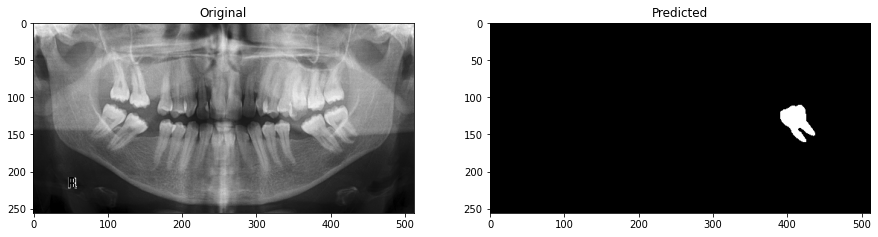

In [ ]:
"""

Making prediction using the trained models
 
"""
model = keras.models.load_model('model.h5', compile=False)

#Read a single image and perform image pre-processing
test_img = cv2.imread('image path', cv2.IMREAD_GRAYSCALE)
orig_to_pass=test_img
orig_to_pass = cv2.resize(test_img, (512, 256))      
test_img = cv2.resize(test_img, (512, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BAYER_GR2GRAY)
test_img = np.expand_dims(test_img, axis=0)

#Make prediction
prediction = model.predict(test_img)>0.5

#----to View original image----#

plt.figure(figsize=(15, 18))
plt.subplot(1, 2, 1)
plt.imshow(orig_to_pass, cmap='gray')
plt.title('Original')
#------------------------------#

#----to View predicted image----#
plt.subplot(1, 2, 2)

prediction_image = prediction.reshape(256,512)

plt.imshow(prediction_image, cmap='gray')
plt.title('Predicted')
#-------------------------------#

#Save predicted image to drive
#plt.imsave('/content/pred.jpg', prediction_image, cmap='gray')